# <span style='font-family:"Times New Roman"'> <span styel=''> Image Compression

## <span style='font-family:"Times New Roman"'> <span styel=''> Loading Required Modules:

In [1]:
from joblib import Parallel, delayed
from skimage.color import rgb2gray
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from itertools import groupby
import tifffile as tif
from numpy import inf
from PIL import Image
import numpy as np
import scipy as sp
import imageio
import math
import glob
import time
import sys
import cv2
import os
%matplotlib inline

In [2]:
plt.rcParams["font.family"] = "Times New Roman"  #Setting Global Font to Times New Roman

In [3]:
abspath = os.path.abspath('') 
os.chdir(abspath)

# <span style='font-family:"Times New Roman"'> <span styel=''>(a) The Discrete Cosine Transform (DCT).

#### <span style='font-family:"Times New Roman"'> <span styel=''>In this part, We will explore the Discrete Cosine Transform (DCT) as applied to images. We will be using the DCT as the fundamental transform that allows for lossy coding of image content. In this part, We will explore the application of the DCT to a grayscale image and the resulting characteristics of the DCT coefficients. In particular, We will explore the interpretation of the DCT as a set of basis images with which to represent an image, i.e., decomposition and recomposition. The implementation of the DCT in this part will become a key component of a JPEG-like image compression in subsequent project parts.

## <span style='font-family:"Times New Roman"'> <span styel=''> (a-i) The DCT and IDCT:

#### <span style='font-family:"Times New Roman"'> <span styel=''>In section (a), `mandrill.tif` image from [1] is used. 
<span style='font-family:"Times New Roman"'>[1] Gonzalez, Rafael C., Richard Eugene Woods, and Steven L. Eddins. Digital image processing using MATLAB. Pearson Education India, 2004.

In [4]:
I = tif.imread('mandrill.tif')

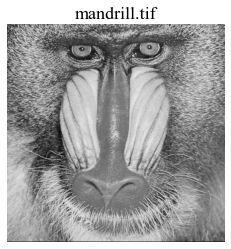

In [5]:
plt.title('mandrill.tif', fontsize = 18)
plt.imshow(I, cmap = 'gray')
plt.axis('off')
plt.show()

In [6]:
# DCT of the Image
I_DCT = sp.fft.dct(sp.fft.dct(I,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)

In [7]:
# Inverse DCT of the Image
I_IDCT = sp.fft.idct(sp.fft.idct(I_DCT,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)

In [8]:
I8 = I[0:8,0:8]
print('I8 values are :')
print(I8)

I8 values are :
[[147  56  47  90 138  92  58  30]
 [119 100  38  69  89  53  64  46]
 [ 76 115  44  46 100  59  59  46]
 [ 73 139  96  49  84 122  52  46]
 [ 86 125 132  48  78  86  74  47]
 [ 82  77 161  58  73  96  41  44]
 [ 41  50 136 130  73 124  52  62]
 [ 30  50 115 154  87 118  47  56]]


In [9]:
I8_DCT = sp.fft.dct(sp.fft.dct(I8,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
print('I8_DCT values are :')
print(I8_DCT)

I8_DCT values are :
[[ 6.34375000e+02  8.61531406e+01 -7.90661487e+01  3.59418320e+01
  -3.51250000e+01 -2.95505330e+01  3.61327467e+01 -1.56786441e-01]
 [-2.21169646e+01  3.45160002e+01  8.05271755e+01  9.94535638e+01
   5.58395501e+01 -2.90154645e+01 -7.92256996e+01  2.76134853e+01]
 [ 1.07476821e+00 -3.25412001e+01 -5.89081935e+01  1.47484235e+01
   8.51839342e+01  5.93451867e+01  6.10983496e+00 -2.47594470e+01]
 [ 1.98080888e+01  2.79809334e+01  7.38867628e+00  1.01368151e+01
  -4.90480344e-01  2.46403559e+01  4.48118977e+01  4.08846781e+01]
 [ 2.86250000e+01  4.77142990e-01 -1.85152274e+01  1.93685529e+01
  -6.37500000e+00 -3.26443955e+00  2.66319437e+00 -8.59723372e+00]
 [ 1.04972376e+01 -1.72983687e+01 -2.82750108e+01  1.30077351e+01
  -2.37016429e+00 -5.40547490e+00  2.36216891e+01 -1.53223674e+01]
 [-1.27573948e+01  6.18899350e+00 -6.64016504e+00  8.51653496e+00
   8.68784229e+00 -9.45760085e+00  4.90819350e+00  2.19263923e+01]
 [-1.31339176e+00 -1.20191355e+01 -6.86388203e-01

In [10]:
I8_v2 = sp.fft.idct(sp.fft.idct(I8_DCT,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
print('I8_v2 values are :')
print(I8_v2)

I8_v2 values are :
[[147.  56.  47.  90. 138.  92.  58.  30.]
 [119. 100.  38.  69.  89.  53.  64.  46.]
 [ 76. 115.  44.  46. 100.  59.  59.  46.]
 [ 73. 139.  96.  49.  84. 122.  52.  46.]
 [ 86. 125. 132.  48.  78.  86.  74.  47.]
 [ 82.  77. 161.  58.  73.  96.  41.  44.]
 [ 41.  50. 136. 130.  73. 124.  52.  62.]
 [ 30.  50. 115. 154.  87. 118.  47.  56.]]


In [11]:
DA = np.subtract(I8, I8_v2) # Difference array
SQA = np.square(DA) # squared array
MSE = SQA.mean() # Mean of squared array

In [12]:
print('The mean-squared error between I8 and I8_v2 is :')
print("%.4f" % MSE)

The mean-squared error between I8 and I8_v2 is :
0.0000


## <span style='font-family:"Times New Roman"'> <span styel=''>  (a-ii) DCT Basis Images:

In [13]:
IDCTUV = np.zeros((8,8,64))
k = 0
for i in range (0,8):
    for j in range (0,8):
        DCTUV = np.zeros((8,8))
        DCTUV[i,j] = 1
        IDCTUV[:,:,k] = DCTUV
        k += 1

In [14]:
DCTBI = sp.fft.idct(sp.fft.idct(IDCTUV,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)

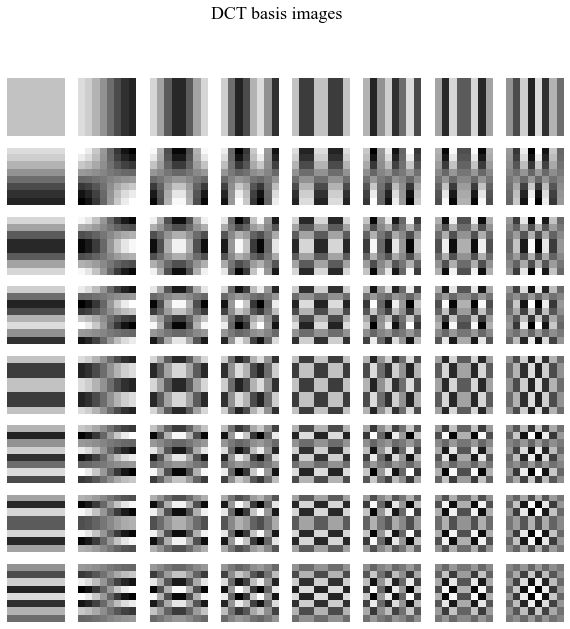

In [15]:
nrows,ncols = 8,8
plt.figure(figsize=(10,10))
for y in range(64):
    plt.subplot(nrows,ncols,y+1)
    plt.imshow(DCTBI[:,:,y] , cmap = 'gray', vmin = DCTBI.min(), vmax = DCTBI.max())
    plt.axis('off')
plt.suptitle('DCT basis images', fontsize = 18)
plt.show()

## <span style='font-family:"Times New Roman"'> <span styel=''>  (a-iii) DCT of Image Tiles as Superposition of Basis Images I:

In [16]:
#This function Removes the n largest values from given 2D array
#And replace them with zeros

def ZEM(Inp_arr,n):   #Zeros all arrays except absolute max
    out = np.zeros_like(Inp_arr)
    flat = np.abs(Inp_arr).flatten()
    indices = np.argpartition(flat, -2)[-n:]
    idx = indices[np.argsort(-flat[indices])]
    out.flat[idx] = Inp_arr.flat[idx]
    return out

In [17]:
#DCTcomp function requires ZEM function to run

def DCTcomp(Im, n):
    I_reshape = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    DCT = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    ZM = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    FI = np.zeros((Im.shape[0],Im.shape[1]))
    k = 0
    for c in range (0,Im.shape[1],8):
        for r in range (0,Im.shape[0],8):
            I_dump = Im[c : c + 8 , r : r + 8]
            I_reshape[:,:,k] = I_dump
            DCT[:,:,k] = sp.fft.dct(sp.fft.dct(I_reshape[:,:,k],type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            k += 1
    for k in range (0,int(Im.shape[0]*Im.shape[1]/64)):
        ZM[:,:,k] = ZEM(DCT[:,:,k], n)
    ZM_IDCT = sp.fft.idct(sp.fft.idct(ZM,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
    k = 0
    for c in range (0,Im.shape[1],8):
        for r in range (0,Im.shape[0],8):
            FI[c : c + 8 , r : r + 8] = ZM_IDCT[:,:,k]
            k += 1
    return (FI) #Final Compressed Image

In [18]:
I_1basis = DCTcomp(I, 1)

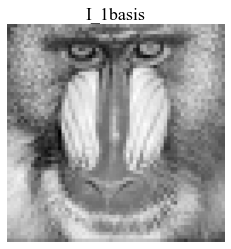

In [19]:
plt.title('I_1basis', fontsize = 18)
plt.imshow(I_1basis, cmap = 'gray')
plt.axis('off')
plt.show()

In [20]:
DA = np.subtract(I, I_1basis) # Difference array
SQA = np.square(DA) # squared array
MSE = SQA.mean() # Mean of squared array

In [21]:
print('The mean-squared error between I and I_1basis is :')
print("%.4f" % MSE)

The mean-squared error between I and I_1basis is :
740.2991


#### <span style='font-family:"Times New Roman"'> <span styel=''>Here, we only retained one largest coefficient (the most important one) from our 8 by 8 DCT tiles. The quality of image has degraded significantly, and types of artifacts appeared here are different with respect to each 8 by 8 tile.    

## <span style='font-family:"Times New Roman"'> <span styel=''> (a-iv) DCT of Image Tiles as Superposition of Basis Images II:

In [22]:
I_2basis = DCTcomp(I, 2)

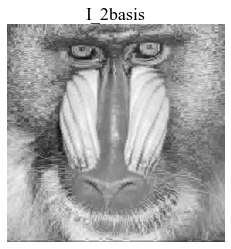

In [23]:
plt.title('I_2basis', fontsize = 18)
plt.imshow(I_2basis, cmap = 'gray')
plt.axis('off')
plt.show()

In [24]:
DA = np.subtract(I, I_2basis) # Difference array
SQA = np.square(DA) # squared array
MSE = SQA.mean() # Mean of squared array

In [25]:
print('The mean-squared error between I and I_2basis is :')
print("%.4f" % MSE)

The mean-squared error between I and I_2basis is :
537.6932


#### <span style='font-family:"Times New Roman"'> <span styel=''>As it was expected, when retaining two largest basis values, the MSE decrease compared to the situation when only one largest basis value is remaining.
#### <span style='font-family:"Times New Roman"'> <span styel=''>The reason for this is we are keeping coefficients that have significant importance in our image. When we keep more of these coefficient, we will have an image which is similar to original image.  


## <span style='font-family:"Times New Roman"'> <span styel=''>(a-v) DCT of Image Tiles as Superposition of Basis Images III:

In [26]:
start_time = time.time()
MSE_Total = []
for m in range (1,65):
    I_basis = DCTcomp(I, m)
    DA = np.subtract(I, I_basis) # Difference array
    SQA = np.square(DA) # squared array
    MSE = SQA.mean() # Mean of squared array
    MSE_Total = np.append(MSE,MSE_Total)
elapsed_time = time.time() - start_time

In [27]:
print('Elapsed Time (sec):')
print(time.time() - start_time)

Elapsed Time (sec):
12.669878244400024


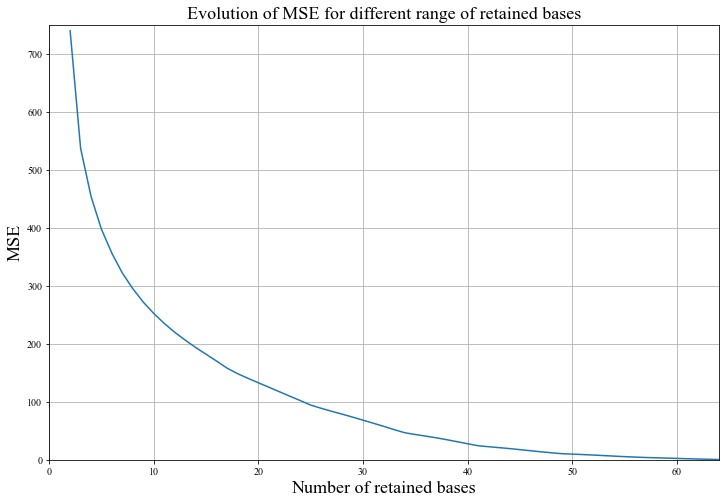

In [28]:
plt.figure(figsize = (12,8))
plt.title('Evolution of MSE for different range of retained bases', fontsize = 18)
plt.plot(range (65,1,-1),MSE_Total)
plt.xlabel('Number of retained bases', fontsize = 18)
plt.ylabel('MSE', fontsize = 18)
plt.xlim([0,64])
plt.ylim([0,MSE_Total.max()+10])
plt.grid()
plt.show()

#### <span style='font-family:"Times New Roman"'> <span styel=''> According to plot, by retaining more coefficients, the MSE decreases as expected. When retaining a single coefficient (the largest and most important one) maximum MSE value is calculated. By keeping more and more of these coefficient, we get closer to original image and eventually we reach MSE value of zero.   

# <span style='font-family:"Times New Roman"'> <span styel=''>(b) Entropy and the Effects of DCT on Entropy.

#### <span style='font-family:"Times New Roman"'> <span styel=''> In this part, we will explore the effects that the DCT has on entropy of an image representation. Throughout this part, we will compute the entropy of the image in the spatial domain and in the tiled DCT domain.

## <span style='font-family:"Times New Roman"'> <span styel=''>(b-i) Spatial Domain Image Entropy:

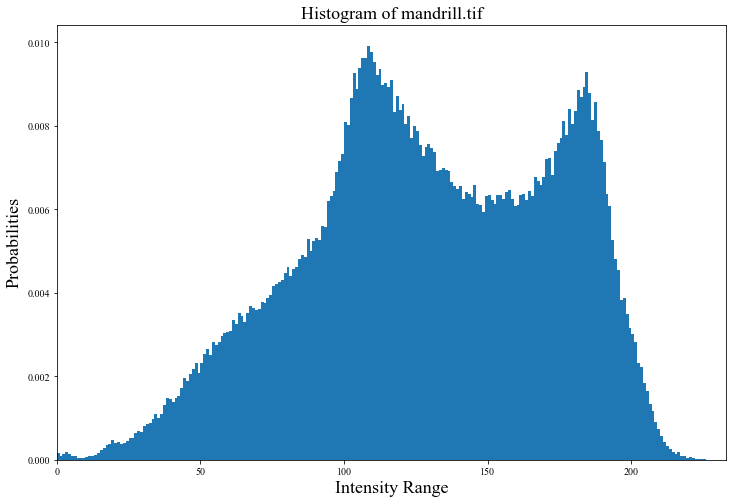

In [29]:
plt.figure(figsize = (12,8))
nbins = len(range(I.min(),I.max()+1))
n, bins, rectangles = plt.hist(I.flatten(), bins=nbins, range = (I.min(), I.max()+1), density=True)
plt.title('Histogram of mandrill.tif', fontsize = 18)
plt.xlabel('Intensity Range', fontsize = 18)
plt.ylabel('Probabilities', fontsize = 18)
plt.xlim([I.min() , I.max()+1])
plt.show()

#### <span style='font-family:"Times New Roman"'> <span styel=''>A function for calculating Entropy based on equation (8-7) of [1] is developed.
<span style='font-family:"Times New Roman"'>[1] Gonzalez, Rafael C., Richard Eugene Woods, and Steven L. Eddins. Digital image processing using MATLAB. Pearson Education India, 2004.

In [30]:
def entropycalc(Img):
    Img = Img.astype(int)
    nb = len(range(np.min(Img),np.max(Img)+1))    # Number of bins for histogram 
    prob = plt.hist(Img.flatten(), bins=nb, range = (Img.min(), Img.max() + 1))[0]/Img.size
    plt.close()
    # Removing zero values from probabilities calculated by histogram function
    prob = list(filter(lambda p: p > 0, np.ravel(prob)))
    entropy = -np.sum(np.multiply(prob, np.log2(prob)))
    return entropy

In [31]:
entropy = entropycalc(I)

In [32]:
print('The entropy of the original spatial domain of mandrill image is :')
print("%.4f" % entropy, 'bits/pixel')

The entropy of the original spatial domain of mandrill image is :
7.3804 bits/pixel


#### <span style='font-family:"Times New Roman"'> <span styel=''>The higher value of entropy means more detailed information. Here, our entropy value is 7.3806 bits per pixel meaning we need 2^8 = 256 different values to represent our image without information loss. Also, if we use 2^7 = 128 values for our pixel, we should be able to get a good enough representation of our image without too many information loss.   

## <span style='font-family:"Times New Roman"'> <span styel=''>(b-ii) DCT of Image Tiles:

In [33]:
def DCTcalc(Im):
    I_reshape = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    DCT = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    IDCTall = np.zeros((Im.shape[0],Im.shape[1]))
    k = 0
    for r in range (0,Im.shape[1],8):
        for c in range (0,Im.shape[0],8):
            I_dump = Im[c : c + 8 , r : r + 8]
            I_reshape[:,:,k] = I_dump
            DCT[:,:,k] = sp.fft.dct(sp.fft.dct(I_reshape[:,:,k],type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            k += 1
    k = 0
    for r in range (0,Im.shape[1],8):
        for c in range (0,Im.shape[0],8):
            IDCTall[c : c + 8 , r : r + 8] = DCT[:,:,k]
            k += 1
    return (IDCTall) 

In [34]:
I_DCT = DCTcalc(I)

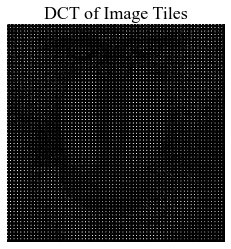

In [35]:
plt.title('DCT of Image Tiles', fontsize = 18)
plt.imshow(I_DCT, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.show()

#### <span style='font-family:"Times New Roman"'> <span styel=''>Here, we represent the DCT of image tiles. In a glance, the overall form of our image could be detected. Also, since we are displaying the DCT values, the larger DCT values are brighter meaning we can detect the location of important DCT coefficients.  

## <span style='font-family:"Times New Roman"'> <span styel=''>(b-iii) DCT Domain Image Entropy I:

In [36]:
I_DCT_int = np.round(I_DCT)

In [37]:
def DCTtoImg(Im):
    I_reshape = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    DCT = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    IDCTall = np.zeros((Im.shape[0],Im.shape[1]))
    k = 0
    for c in range (0,Im.shape[1],8):
        for r in range (0,Im.shape[0],8):
            I_dump = Im[c : c + 8 , r : r + 8]
            I_reshape[:,:,k] = I_dump
            DCT[:,:,k] = sp.fft.idct(sp.fft.idct(I_reshape[:,:,k],type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            k += 1
    k = 0
    for c in range (0,Im.shape[1],8):
        for r in range (0,Im.shape[0],8):
            IDCTall[c : c + 8 , r : r + 8] = DCT[:,:,k]
            k += 1
    return (IDCTall) 

In [38]:
I_intbasis = DCTtoImg(I_DCT_int)

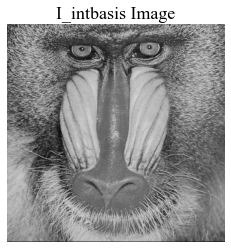

In [39]:
plt.title('I_intbasis Image', fontsize = 18)
plt.imshow(I_intbasis, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.show()

#### <span style='font-family:"Times New Roman"'> <span styel=''>According to the image, there is no observable difference between I_intbasis image and original image. 

In [40]:
DA = np.subtract(I, I_intbasis) # Difference array
SQA = np.square(DA) # squared array
MSE = SQA.mean() # Mean of squared array

In [41]:
print('The mean-squared error between I and I_intbasis is :')
print("%.4f" % MSE)

The mean-squared error between I and I_intbasis is :
0.0836


#### <span style='font-family:"Times New Roman"'> <span styel=''> There is a small MSE value as expected associated with rounding the values in DCT domain to nearest integer between I_intbasis image an doriginal image. The amount of MSE is small compared to when we removed entire bases from the DCT representation

In [42]:
entropy = entropycalc(I_intbasis)

In [43]:
print('The entropy of the original spatial domain for I_intbasis image is :')
print("%.4f" % entropy, 'bits/pixel')

The entropy of the original spatial domain for I_intbasis image is :
7.3806 bits/pixel


#### <span style='font-family:"Times New Roman"'> <span styel=''>The entropy of I_intbasis is the same as I.

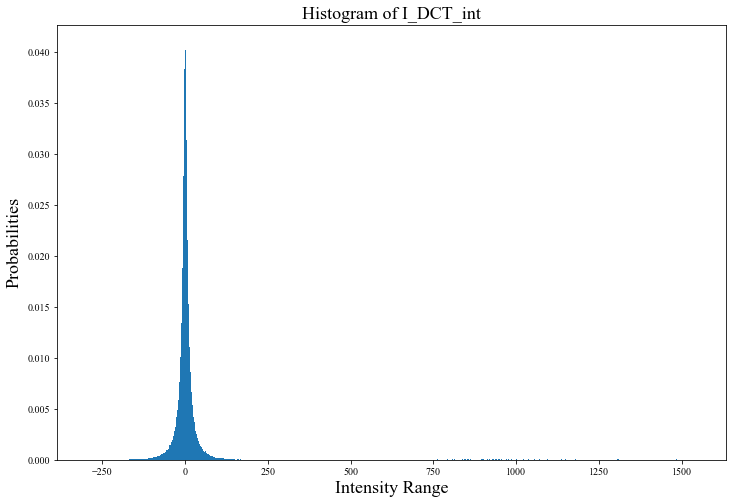

In [44]:
plt.figure(figsize = (12,8))
I_DCT_int = I_DCT_int.astype(int)
n, bins, rectangles = plt.hist(I_DCT_int.flatten(), len(range(np.min(I_DCT_int),np.max(I_DCT_int)+1)), range = (I_DCT_int.min(), I_DCT_int.max() + 1), density=True)
plt.title('Histogram of I_DCT_int', fontsize = 18)
plt.xlabel('Intensity Range', fontsize = 18)
plt.ylabel('Probabilities', fontsize = 18)
plt.xlim([np.min(I_DCT_int),np.max(I_DCT_int)+1])
plt.show()

In [45]:
entropy = entropycalc(I_DCT_int)

In [46]:
print('The entropy of the I_DCT_int image is :')
print("%.4f" % entropy, 'bits/pixel')

The entropy of the I_DCT_int image is :
6.4916 bits/pixel


#### <span style='font-family:"Times New Roman"'> <span styel=''> Calculated MSE value as well as entropy indicates that although rounding introduces small error, they are not significant to change image quality drastically. Hence, for faster compression process, it makes sense to round our values and have integers instead of float numbers.  

## <span style='font-family:"Times New Roman"'> <span styel=''> (b-iv) DCT Domain Image Entropy II:

In [47]:
def DCTcalcround(Im,n):
    I_reshape = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    DCT = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    ZM = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    IDCTallrounded = np.zeros((Im.shape[0],Im.shape[1]))
    k = 0
    for c in range (0,Im.shape[1],8):
        for r in range (0,Im.shape[0],8):
            I_dump = Im[c : c + 8 , r : r + 8]
            I_reshape[:,:,k] = I_dump
            DCT[:,:,k] = sp.fft.dct(sp.fft.dct(I_reshape[:,:,k],type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            k += 1
    DCT = np.round(DCT)
    for k in range (0,int(Im.shape[0]*Im.shape[1]/64)):
        ZM[:,:,k] = ZEM(DCT[:,:,k], n)
    k = 0
    for c in range (0,Im.shape[1],8):
        for r in range (0,Im.shape[0],8):
            IDCTallrounded[c : c + 8 , r : r + 8] = ZM[:,:,k]
            k += 1
    return (IDCTallrounded) 

In [48]:
start_time = time.time()
H_DCT = []
for m in range (1,65):
    DCTR = DCTcalcround(I,m)
    entropy = entropycalc(DCTR)
    H_DCT = np.append(entropy,H_DCT)
elapsed_time = time.time() - start_time

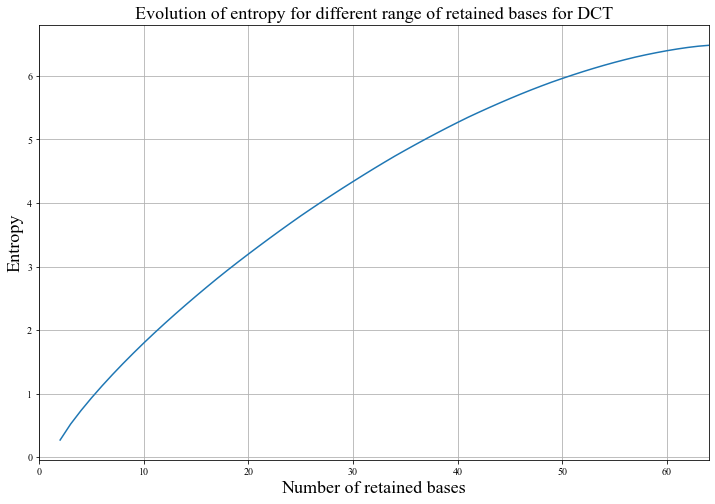

In [49]:
plt.figure(figsize = (12,8))
plt.title('Evolution of entropy for different range of retained bases for DCT', fontsize = 18)
plt.plot(range (65,1,-1),H_DCT)
plt.xlabel('Number of retained bases', fontsize = 18)
plt.ylabel('Entropy', fontsize = 18)
plt.xlim([0,64])
plt.grid()
plt.show()

In [50]:
def IDCTcalcround(Im, n):
    I_reshape = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    DCT = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    ZM = np.zeros((8,8,int(Im.shape[0]*Im.shape[1]/64)))
    IDCTallrounded = np.zeros((Im.shape[0],Im.shape[1]))
    FI = np.zeros((Im.shape[0],Im.shape[1]))
    k = 0
    for c in range (0,Im.shape[1],8):
        for r in range (0,Im.shape[0],8):
            I_dump = Im[c : c + 8 , r : r + 8]
            I_reshape[:,:,k] = I_dump
            DCT[:,:,k] = sp.fft.dct(sp.fft.dct(I_reshape[:,:,k],type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            k += 1
    DCT = np.round(DCT)
    for k in range (0,int(Im.shape[0]*Im.shape[1]/64)):
        ZM[:,:,k] = ZEM(DCT[:,:,k], n)
    ZM_IDCT = sp.fft.idct(sp.fft.idct(ZM,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
    k = 0
    for c in range (0,Im.shape[1],8):
        for r in range (0,Im.shape[0],8):
            FI[c : c + 8 , r : r + 8] = ZM_IDCT[:,:,k]
            k += 1
    return (FI) #Final Compressed Image

In [51]:
start_time = time.time()
MSE_Total = []
H_IDCT = []
for m in range (1,65):
    I_basis_rounded = IDCTcalcround(I_intbasis, m)
    entropy1 = entropycalc(I_basis_rounded)
    DA = np.subtract(I_intbasis, I_basis_rounded) # Difference array
    SQA = np.square(DA) # squared array
    MSE = SQA.mean() # Mean of squared array
    MSE_Total = np.append(MSE,MSE_Total)
    H_IDCT = np.append(entropy1,H_IDCT)
elapsed_time = time.time() - start_time

In [52]:
print('Elapsed Time (sec):')
print(time.time() - start_time)

Elapsed Time (sec):
32.417619943618774


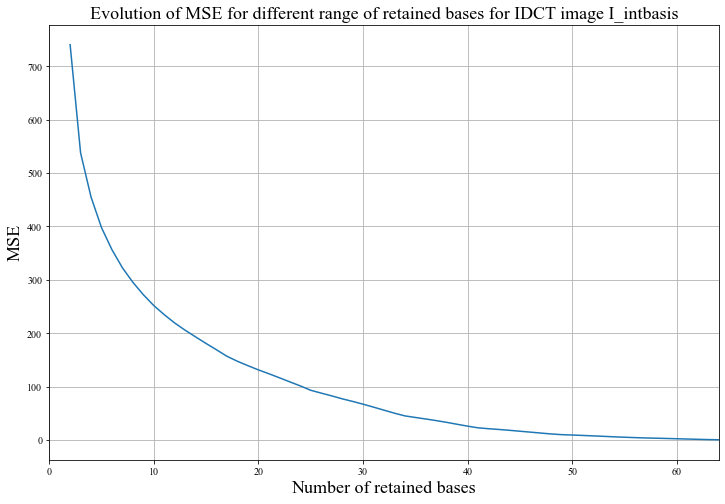

In [53]:
plt.figure(figsize = (12,8))
plt.title('Evolution of MSE for different range of retained bases for IDCT image I_intbasis', fontsize = 18)
plt.plot(range (65,1,-1),MSE_Total)
plt.xlabel('Number of retained bases', fontsize = 18)
plt.ylabel('MSE', fontsize = 18)
plt.xlim([0,64])
plt.grid()
plt.show()

In [54]:
print('Elapsed Time (sec):')
print(time.time() - start_time)

Elapsed Time (sec):
32.59164047241211


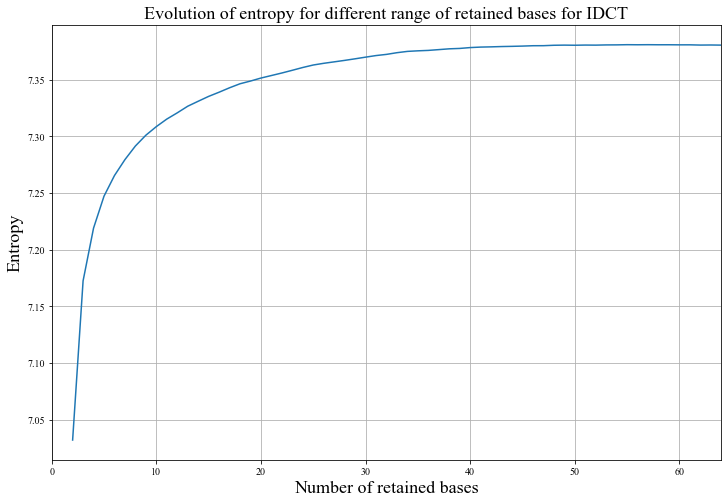

In [55]:
plt.figure(figsize = (12,8))
plt.title('Evolution of entropy for different range of retained bases for IDCT', fontsize = 18)
plt.plot(range (65,1,-1),H_IDCT)
plt.xlabel('Number of retained bases', fontsize = 18)
plt.ylabel('Entropy', fontsize = 18)
plt.xlim([0,64])
plt.grid()
plt.show()

#### <span style='font-family:"Times New Roman"'> <span styel=''>According to presented plots in this subpart, entropy versus number of retained bases for invert discreet cosine transform is the best domain for image compression. According to this figure, for our sample image, after 20 retained bases, the entropy value does not change drastically meaning it would be an optimum choice for image compression by keeping significant values of DCT. 
#### <span style='font-family:"Times New Roman"'> <span styel=''>The MSE plot vs number of retained bases for IDCT image would be the second choice when it comes to compression. Based on this plot, it is observable that after 40 retained bases, the MSE value does not change radically.    
#### <span style='font-family:"Times New Roman"'> <span styel=''>The entropy vs number of retained bases for DCT is the least informative plot for image compression means. 


# <span style='font-family:"Times New Roman"'> <span styel=''>(c) Huffman Codec.

In [56]:
def huffman_codes(I):
    '''
    HUFFMAN_CODES [huff_codes,rev_huff_codes] = huffman_codes(I)
    This function computes a huffman code dictionary for the image I.  The 
    histogram of image I is used a a representation of the distribution of 
    intensities.

    Inputs: I: array - The image to be used to compute the histogram which is
                       used as the estimate of the proability density of 
                       intensities
    Outputs: huff_codes: container.Map - The forward code where the keys are
                         strings consisting of the intensities, e.g., '213'
                         and the values are strings consisting of the binary
                         codewords, e.g., '1001110'
             rev_huff_codes: container.Map - The reverse code where the keys
                             are strings consisting of the binary codewords,
                             e.g., '1001110' and the values are strings 
                             consisting of the intensities, e.g., '213'

    Written by Laura Boucheron 10/13/2020
    Notes:
    No error checking included here.  The function assumes a 2D image will be
    input.  It might work for a 1D vector, but has not been tested.  It will
    likely break if you input a 3D image.

    The input image is cast as in int64 which will introduce some small
    amount of error to the intensities.

    This function should be able to handle any range of intensities that can
    be represented by an int64 variable type.
    '''

    # Cast as integer just in case it isn't already
    I = I.astype(int)
    
    # Compute normalized histogram
    num_bins = len(range(I.min(),I.max()+1)) # Assume number of bins equal to number of integers in dynamic range
    [h,be] = np.histogram(I.flatten(),bins=num_bins,range=(I.min(),I.max()+1)) # compute histogram
    h = h/(I.shape[0]*I.shape[1]) # normalize histogram
    be = be.astype(int) # cast bin edges as integers
    be = be[:-1] # remove right-most bin edge which is I.max()+1

    # Remove zero probability entries
    be = be[h>0]
    h = h[h>0]

    # Create list of probabilities (zeroth column) and intensities (first column)
    h_be = list(zip(h,be.astype(str))) # cast intensities as strings to interpret as symbols
                          
    # Create copy of list of probabilities and intensities to modify in loop below
    h_be2 = h_be.copy()

    # Sort in ascending order of probabilities
    h_be2.sort()

    # Instantiate empty dictionary for Huffman codes (value to code word)
    huff_codes = {value[1]: None for value in h_be}

    # Loop over probabilities and merge two smallest until there is only one element left
    while len(h_be2)>1:
        prob0,values0_str = h_be2[0] # smallest probability
        prob1,values1_str = h_be2[1] # second smallest probability
        del h_be2[0:2] # remove the two smallest probabilities from the working list

        # Grab all symbols corresponding to the two probabilities in question
        values0 = values0_str.split(',') 
        values1 = values1_str.split(',') 
        # Loop over all symbols and prepend a zero to all symbols in the smallest probability 
        for value0 in values0: # 
            if huff_codes[value0]==None:
                huff_codes[value0] = '0'
            else:
                huff_codes[value0] = '0'+huff_codes[value0]
        # Loop over all symbols and prepend a one to all symbols in the second smallest probability
        for value1 in values1:
            if huff_codes[value1]==None:
                huff_codes[value1] = '1'
            else:
                huff_codes[value1] = '1'+huff_codes[value1]
    
        # Append the new merged probability and merged string of symbols
        h_be2.append((prob0+prob1,values0_str+','+values1_str))
        
        # Sort in ascending order of probabilities
        h_be2.sort()

    # Compute reverse Huffman code dictionary (code word to value)
    rev_huff_codes = {v: k for k, v in huff_codes.items()}
    
    # Return Huffman code dictionary and reverse Huffman code dictionary
    return huff_codes, rev_huff_codes

## <span style='font-family:"Times New Roman"'> <span styel=''>(c-i) Huffman Coded Image:

In [175]:
I = tif.imread('mandrill.tif')

In [176]:
HC, RHC = huffman_codes(I)

In [177]:
def huffman_encoder(Img,huff_codes):
    BS = "".join((f'{Img.shape[0]:010b}', f'{Img.shape[1]:010b}')) #Adds shape dimanesion of image as first 20 bitstreams
    for c in range (0,Img.shape[1]):
        for r in range (0,Img.shape[0]):
            mi = Img[c,r] # Intensity of a single pixel
            mis = np.array2string(mi) #Changing String to array
            mb = huff_codes[mis] #bitstream for single Image
            BS = "".join((BS, mb))
    return BS

In [178]:
I_bits = huffman_encoder(I,HC)

In [179]:
print('Compression ratio is: ')
I_bits = huffman_encoder(I,HC)
print("%.4f" % (np.divide(8,(len(I_bits))/I.size)))

Compression ratio is: 
1.0807


In [180]:
print("The first 40 bits of bitstream are :")
print(I_bits[0:40])

The first 40 bits of bitstream are :
1000000000100000000000000011111101001011


In [181]:
print("I_bits Length is :")
print(len(I_bits))

I_bits Length is :
1940549


#### <span style='font-family:"Times New Roman"'> <span styel=''>When using Huffman encoder, we only need 2 bits (0 and 1) for representing an image (total of 1,940,549) while for native uint8 representation for monochromic images, we need 8 bits to represent it (total of 2,097,152).  

## <span style='font-family:"Times New Roman"'> <span styel=''> (c-ii) Huffman Coded DCT Image:

In [182]:
I_DCT_int = I_DCT_int.astype('uint8')

In [183]:
HCint, RHCint = huffman_codes(I_DCT_int)

In [184]:
I_bits_int = huffman_encoder(I_DCT_int,HCint)

In [185]:
print("The first 40 bits of bitstream for I_DCT_int are :")
print(I_bits_int[0:40])

The first 40 bits of bitstream for I_DCT_int are :
1000000000100000000000110110101000100001


In [186]:
print('Compression ratio is: ')
print("%.4f" %(np.divide(8,(len(I_bits_int))/I_DCT_int.size)))

Compression ratio is: 
1.2544


In [189]:
print("I_bits_int Length is :")
print(len(I_bits_int))

I_bits_int Length is :
1671857


#### <span style='font-family:"Times New Roman"'> <span styel=''>The number of bits required to represent I_bits_int is 1,671,857. I_DCT_int has type `uint8` which is the smallest possible type we can cast our DCT in and again, as pervious discussion, we need 8 bits to represent it. This is the same number for original image I casted in `uint8` type. 

## <span style='font-family:"Times New Roman"'> <span styel=''> (c-iii) Huffman Decoder:

In [68]:
def huffman_decoder (Ibits, Dict):
    #Converting first 20 bitstreams to image dimensions  
    c = int(Ibits[0:10], 2)
    r = int(Ibits[10:20], 2)
    Ibits = Ibits[20:]
    MS = []
    res = ""
    while Ibits:
        for k in Dict:
            if Ibits.startswith(k):
                # Finding key values from dictionary 
                res = Dict[k]
                Ibits = Ibits[len(k):]
                #Appending intensity values as strings
                MS.append(str(res))
    #Converting strings to array
    Img = np.array(MS)
    Img = Img.reshape((r,c))
    Img = Img.astype('uint8')
    return (Img)

In [69]:
I_vec = huffman_decoder (I_bits, RHC)

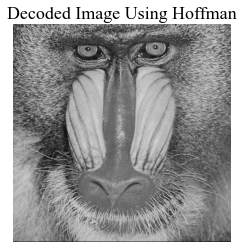

In [70]:
plt.title('Decoded Image Using Hoffman', fontsize = 18)
plt.imshow(I_vec, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.show()

In [71]:
DA = np.subtract(I, I_vec) # Difference array
SQA = np.square(DA) # squared array
MSE = SQA.mean() # Mean of squared array

In [72]:
print('The mean-squared error between I and Decoded I is :')
print("%.4f" % MSE)

The mean-squared error between I and Decoded I is :
0.0000


In [73]:
I_vec_int = huffman_decoder (I_bits_int, RHCint)

In [74]:
DA = np.subtract(I_DCT_int, I_vec_int) # Difference array
SQA = np.square(DA) # squared array
MSE = SQA.mean() # Mean of squared array

In [75]:
print('The mean-squared error between I_DCT_int and Decoded I_DCT_int is :')
print("%.4f" % MSE)

The mean-squared error between I_DCT_int and Decoded I_DCT_int is :
0.0000


#### <span style='font-family:"Times New Roman"'> <span styel=''> The zero value MSEs show that the decoder decodes two bitstreams with zero error. 

# <span style='font-family:"Times New Roman"'> <span styel=''>(d) Block Transform Coding.

#### <span style='font-family:"Times New Roman"'> <span styel=''>In this part, We will implement a threshold coding of the DCT coefficients of a grayscale image. This is a main source of compression leveraged by the JPEG compression standard. We note, however, that the JPEG compression standard is very complicated, and we are not implementing the full standard.

## <span style='font-family:"Times New Roman"'> <span styel=''>(d-i) DCT of Offset Intensities:

In [146]:
I = tif.imread('mandrill.tif')

In [147]:
I_offset = I.astype('float') - 128

In [148]:
I_DCT = DCTcalc(I_offset)
I_DCT = np.round(I_DCT)

In [149]:
HCoff, RHCoff = huffman_codes(I_DCT)
I_bits = huffman_encoder(I_DCT.astype('int'),HCoff)

In [150]:
print("The first 40 bits of bitstream for DCT of I_offset are :")
print(I_bits[0:40])

The first 40 bits of bitstream for DCT of I_offset are :
1000000000100000000010000110000100110111


In [151]:
print("The total number of bits in I_bits are :")
print(len(I_bits))

The total number of bits in I_bits are :
1697717


#### <span style='font-family:"Times New Roman"'> <span styel=''>As expected, the bitstreams here is different from part (c-ii) since we are offsetting image values. 

## <span style='font-family:"Times New Roman"'> <span styel=''>(d-ii) Threshold Coding:

In [152]:
Z = ([[16, 11, 10, 16, 24, 40, 51, 61], [12, 12, 14, 19, 26, 58, 60, 55], [14, 13, 16, 24, 40, 57, 69, 56],\
     [14, 17, 22, 29, 51, 87, 80, 62], [18, 22, 37, 56, 68, 109, 103, 77], [24, 35, 55, 64, 81, 104, 113, 92], \
      [49, 64, 78, 87, 103, 121, 120, 101], [72, 92, 95, 98, 112, 100, 103, 99]])

In [153]:
I_DCT_reshape = np.zeros((8,8,int(I_DCT.shape[0]*I_DCT.shape[1]/64)))
I_DCT_hat = np.zeros((I_DCT.shape[0],I_DCT.shape[1]))
k = 0
for c in range (0,I_DCT.shape[1],8):
    for r in range (0,I_DCT.shape[0],8):
        I_dump = np.divide(I_DCT[c : c + 8 , r : r + 8],Z)
        I_DCT_reshape[:,:,k] = np.round(I_dump)   #Rounding values 
        k += 1
k = 0
for c in range (0,I_DCT.shape[1],8):
    for r in range (0,I_DCT.shape[0],8):
        I_DCT_hat[c : c + 8 , r : r + 8] = I_DCT_reshape[:,:,k]
        k += 1

In [154]:
print('The total number of coefficients in I_DCT that are identically zero: ')
print(np.count_nonzero(I_DCT == 0))

The total number of coefficients in I_DCT that are identically zero: 
10646


In [155]:
print('The total number of coefficients in I_DCT_hat that are identically zero: ')
print(np.count_nonzero(I_DCT_hat == 0))

The total number of coefficients in I_DCT_hat that are identically zero: 
193834


#### <span style='font-family:"Times New Roman"'> <span styel=''> We expect that the implementation of the threshold coding should result in many of the DCT coefficients being clipped to 0. This can be seen from number of zero elements in I_DCT and I_DCT_hat.

In [156]:
HC_hat, RHC_hat = huffman_codes(I_DCT_hat)

In [157]:
I_bits_hat = huffman_encoder(I_DCT_hat.astype('int'),HC_hat)

In [158]:
print("The first 40 bits of bitstream for I_bits_hat are :")
print(I_bits_hat[0:40])

The first 40 bits of bitstream for I_bits_hat are :
1000000000100000000001100010001001101001


In [159]:
print("The total number of bits in I_bits_hat are :")
print(len(I_bits_hat))

The total number of bits in I_bits_hat are :
509510


#### <span style='font-family:"Times New Roman"'> <span styel=''>The first 40 bits of the bitstream has changed compared to part (d-i) and it was expected since we have implemented threshold coding. Also, the number of bits in the bitstream is significantly smaller.    

## <span style='font-family:"Times New Roman"'> <span styel=''> (d-iii) Zig-zag Coding:

In [160]:
def huffman_encoder_zz(Img,huff_codes):
    zigzagedImg = []
    I_reshape = np.zeros((8,8,int(Img.shape[0]*Img.shape[1]/64)))
    k = 0
    BS = []
    for r in range (0,Img.shape[0],8):
        for c in range (0,Img.shape[1],8):
            I_dump = Img[r : r + 8 , c : c + 8]
            I_reshape[:,:,k] = I_dump
            k += 1
    k = 0
    for k in range (0,int(Img.shape[0]*Img.shape[1]/64)):
        II = I_reshape[:,:,k]
        #Zigzag scanning implementation (gets matrix and sort it in a zigzag fashion)
        zigzaged = np.concatenate([np.diagonal(II[::-1,:], k)[::(2*(k % 2)-1)] for k in range(1-II.shape[0], II.shape[0])])
        zigzagedImg = np.append(zigzagedImg,zigzaged)
        k += 1
    BS = "".join((f'{Img.shape[0]:010b}', f'{Img.shape[1]:010b}')) #Bitstream
    zigzagedImgFinal = np.asarray(zigzagedImg)
    zigzagedImgFinal = zigzagedImgFinal.astype(int)
    for i in range (0,zigzagedImgFinal.shape[0]):
        mi = zigzagedImgFinal[i] # Intensity of a single pixel
        mis = np.array2string(mi)
        mb = huff_codes[mis] #bitstream for single Image
        BS += mb
    return BS

In [161]:
I_bits_zz = huffman_encoder_zz(I_DCT_hat.astype('int'),HC_hat)

In [162]:
print("The first 40 bits of bitstream for I_bits_zz are :")
print(I_bits_zz [0:40])

The first 40 bits of bitstream for I_bits_zz are :
1000000000100000000001100010001001101001


In [163]:
print("The total number of bits in I_bits_zz are :")
print(len(I_bits_zz))

The total number of bits in I_bits_zz are :
509510


#### <span style='font-family:"Times New Roman"'> <span styel=''> The results here are identical to the results we got from last part (by chance)! Since we are not doing any operation on pixel values and the type of scanning is different, number of bits should remain the same. However, since the type of scanning is different, the order of bits in the bitstream definitely has changed.    

## <span style='font-family:"Times New Roman"'> <span styel=''>(d-iv) Exploring Run-lengths:

In [164]:
#Grouping my bitstreams here 
groups = groupby(I_bits_zz)
result = [(label, sum(1 for _ in group)) for label, group in groups]
result = [ x for x in result if '1' not in x ] # Removing ones from my calculations 
ZR = [item[1] for item in result] #zero repetitions sorted inside different strings 

In [165]:
OCC = []
for i in range(0,25):
    #counting number of zero run length 
    OC = ZR.count(i)
    OCC = np.append(OCC,OC)

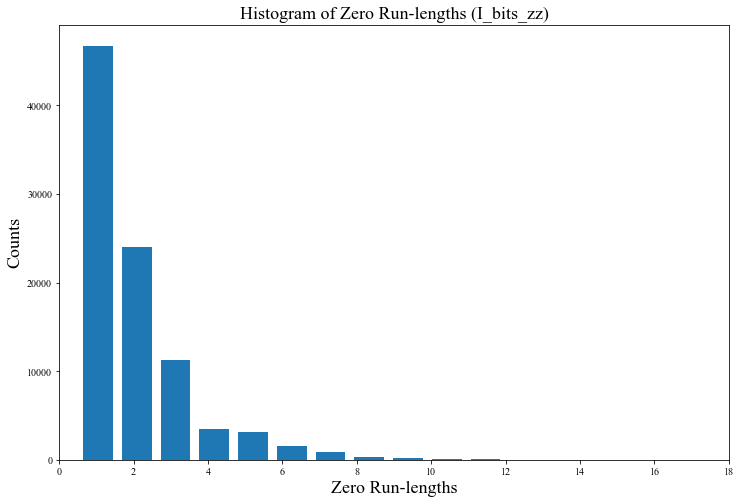

In [166]:
plt.figure(figsize = (12,8))
plt.bar(np.linspace(0, 25, num=25), OCC, align='center')
plt.title('Histogram of Zero Run-lengths (I_bits_zz)', fontsize = 18)
plt.xlabel('Zero Run-lengths', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)
plt.xlim([0,18])
plt.show()

In [167]:
groups = groupby(I_bits_hat)
result = [(label, sum(1 for _ in group)) for label, group in groups]
result = [ x for x in result if '1' not in x ]
ZR = [item[1] for item in result] #zero repetitions

In [168]:
OCC = []
for i in range(0,25):
    OC = ZR.count(i)
    OCC = np.append(OCC,OC)

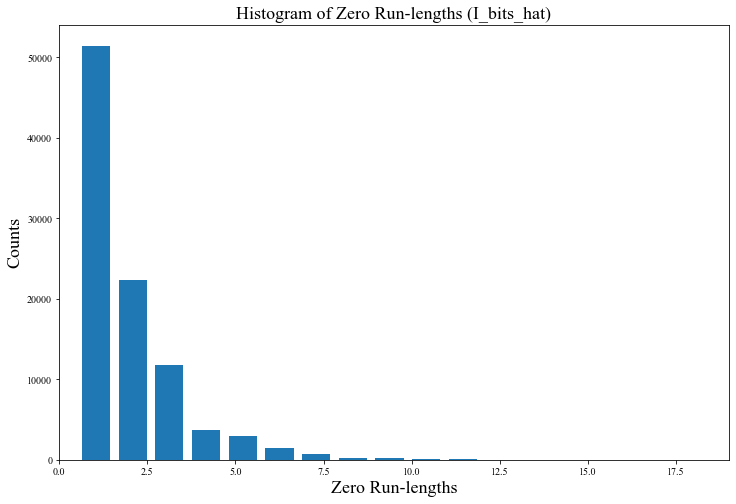

In [169]:
plt.figure(figsize = (12,8))
plt.bar(np.linspace(0, 25, num=25), OCC, align='center')
plt.title('Histogram of Zero Run-lengths (I_bits_hat)', fontsize = 18)
plt.xlabel('Zero Run-lengths', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)
plt.xlim([0,19])
plt.show()

#### <span style='font-family:"Times New Roman"'> <span styel=''>One of the motivations for the zig-zag encoding of DCT tiles is that it is expected to allow for longer runs of 0-valued bits. According to the presented histograms, the 0 run lengths of I_bits_zz has increased as we were expecting it. First of all, number of single zeros is decreased compared to I_bits histogram. Also, the number of 0 run length has increased from 15 to 18 verifying the increase in zero run length. 

## <span style='font-family:"Times New Roman"'> <span styel=''> (d-v) Zig-zag Decoder:

#### <span style='font-family:"Times New Roman"'> <span styel=''> For inverse zigzagged implementation, an efficient code (https://github.com/getsanjeev/compression-DCT) is leveraged.   

In [170]:
def inverse_zigzag(input, vmax, hmax):
    h = 0
    v = 0
    vmin = 0
    hmin = 0
    output = np.zeros((vmax, hmax))
    i = 0
    while ((v < vmax) and (h < hmax)): 
        if ((h + v) % 2) == 0:                 # going up
            if (v == vmin):
                output[v, h] = input[i]        # if we got to the first line
                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        
                i = i + 1
            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
                output[v, h] = input[i] 
                v = v + 1
                i = i + 1
            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
                output[v, h] = input[i] 
                v = v - 1
                h = h + 1
                i = i + 1
        
        else:                                    # going down
            if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
                output[v, h] = input[i] 
                h = h + 1
                i = i + 1
            elif (h == hmin):                  # if we got to the first column
                output[v, h] = input[i] 
                if (v == vmax -1):
                    h = h + 1
                else:
                    v = v + 1
                i = i + 1
            elif((v < vmax -1) and (h > hmin)):     # all other cases
                output[v, h] = input[i] 
                v = v + 1
                h = h - 1
                i = i + 1
        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
            output[v, h] = input[i] 
            break
    return output

In [171]:
def huffman_decoder_zz(Ib,Dict):
    FI = np.zeros((512,512))
    r = int(Ib[0:10], 2)
    c = int(Ib[10:20], 2)
    Ibits = Ib[20:]
    MS = []
    res = ""
    while Ibits:
        for k in Dict:
            if Ibits.startswith(k):
                res = Dict[k]
                Ibits = Ibits[len(k):]
                MS.append(res)
    Img = np.array(MS)
    ImgReshaped = np.reshape(Img,(4096,8,8))
        
    k = 0
    for r in range (0,FI.shape[0],8):
        for c in range (0,FI.shape[1],8):
            II = ImgReshaped[k,:,:]
            Invzz = inverse_zigzag(II.flatten(), 8, 8)
            FI[r : r + 8 , c : c + 8] = Invzz
            k += 1  
    return FI

In [172]:
Decoded_I_bits_zz = huffman_decoder_zz(I_bits_zz,RHC_hat)

In [173]:
DA = np.subtract(I_DCT_hat, Decoded_I_bits_zz) # Difference array
SQA = np.square(DA) # squared array
MSE = SQA.mean() # Mean of squared array

In [174]:
print('The mean-squared error between I_DCT_hat and Decoded I_DCT_hat using Zigzag scan is :')
print("%.4f" % MSE)

The mean-squared error between I_DCT_hat and Decoded I_DCT_hat using Zigzag scan is :
0.0000


## <span style='font-family:"Times New Roman"'> <span styel=''> (d-vi) Image Quality versus Compression Ratio:

In [105]:
def huffman_decoder_zz(Ib,Dict):
    r = int(Ib[0:10], 2)
    c = int(Ib[10:20], 2)
    FI = np.zeros((r,c))
    Ibits = Ib[20:]
    MS = []
    res = ""
    while Ibits:
        for k in Dict:
            if Ibits.startswith(k):
                res = Dict[k]
                Ibits = Ibits[len(k):]
                MS.append(str(res))
    Img = np.array(MS)
    ImgReshaped = np.reshape(Img,(int((c*r)/64),8,8))
        
    k = 0
    for r in range (0,FI.shape[0],8):
        for c in range (0,FI.shape[1],8):
            II = ImgReshaped[k,:,:]
            Invzz = inverse_zigzag(II.flatten(), 8, 8)
            FI[r : r + 8 , c : c + 8] = sp.fft.idct(sp.fft.idct(Invzz,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            k += 1  
    return FI

In [106]:
I = tif.imread('mandrill.tif')
I_offset = I.astype('float') - 128

In [107]:
I_DCT = DCTcalc(I_offset)
I_DCT = np.round(I_DCT)

In [108]:
FImage = np.zeros((512,512,6))
SF = [1,2,4,8,16,32]
C = [] #Compression Ratio
b = 8 * (512**2)
Err = []
for m in range (len(SF)):
    I_DCT_reshape = np.zeros((8,8,int(I_DCT.shape[0]*I_DCT.shape[1]/64)))
    I_DCT_hat = np.zeros((I_DCT.shape[0],I_DCT.shape[1]))
    k = 0
    for r in range (0,I_DCT.shape[0],8):
        for c in range (0,I_DCT.shape[1],8):
            I_dump = np.divide(I_DCT[r : r + 8 , c : c + 8],np.dot(SF[m],Z))
            I_DCT_reshape[:,:,k] = np.round(I_dump)
            k += 1
    k = 0
    for r in range (0,I_DCT.shape[0],8):
        for c in range (0,I_DCT.shape[1],8):
            I_DCT_hat[r : r + 8 , c : c + 8] = I_DCT_reshape[:,:,k]
            k += 1
    HC_hat, RHC_hat = huffman_codes(I_DCT_hat)
    I_bits_zz = huffman_encoder_zz(I_DCT_hat.astype('int'),HC_hat)
    bprime = len(I_bits_zz)
    CR = b/bprime
    C = np.append(C,CR)
    Decoded_I_bits_zz = huffman_decoder_zz(I_bits_zz,RHC_hat)
    FImage[:,:,m] = Decoded_I_bits_zz
    DA = np.subtract(I.astype('int'), Decoded_I_bits_zz.astype('int') + 128) # Difference array
    SQA = np.square(DA) # squared array
    MSE = SQA.mean() # Mean of squared array
    Err = np.append(Err,MSE)

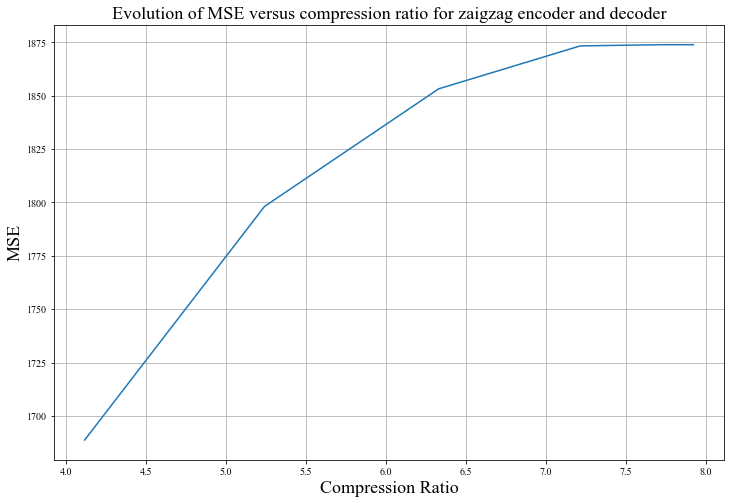

In [109]:
plt.figure(figsize = (12,8))
plt.title('Evolution of MSE versus compression ratio for zaigzag encoder and decoder', fontsize = 18)
plt.plot(C,Err)
plt.xlabel('Compression Ratio', fontsize = 18)
plt.ylabel('MSE', fontsize = 18)
plt.grid()
plt.show()

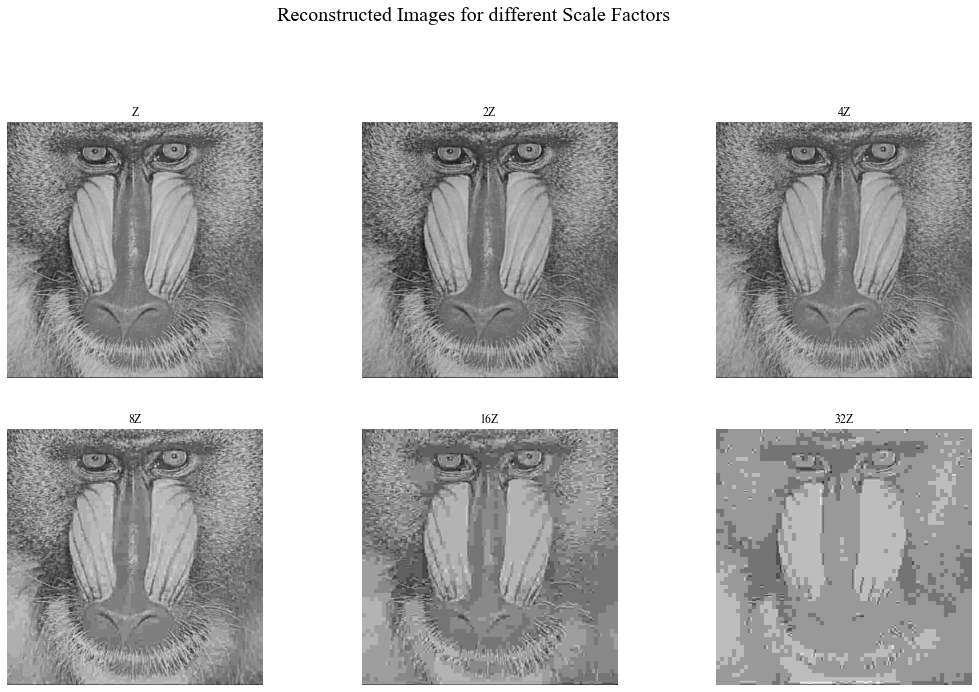

In [110]:
fig = plt.figure(figsize=(18, 16))
plt.subplot(3, 3, 1)
plt.imshow(FImage[:,:,0], cmap='gray')
plt.title('Z')
plt.axis('off')
plt.subplot(3, 3, 2)
plt.imshow(FImage[:,:,1], cmap='gray')
plt.title('2Z')
plt.axis('off')
plt.subplot(3, 3, 3)
plt.imshow(FImage[:,:,2], cmap='gray')
plt.title('4Z')
plt.axis('off')
plt.subplot(3, 3, 4)
plt.imshow(FImage[:,:,3], cmap='gray')
plt.title('8Z')
plt.axis('off')
plt.subplot(3, 3, 5)
plt.imshow(FImage[:,:,4], cmap='gray')
plt.title('16Z')
plt.axis('off')
plt.subplot(3, 3, 6)
plt.imshow(FImage[:,:,5], cmap='gray')
plt.title('32Z')
plt.axis('off')
fig.suptitle('Reconstructed Images for different Scale Factors', fontsize = 20)
plt.show()

# <span style='font-family:"Times New Roman"'> <span styel=''> (e) (Graduate Only) General Huffman Tables.

#### <span style='font-family:"Times New Roman"'> <span styel=''> In the previous parts of the project, we have computed a Huffman code table for the single image that we are coding. In general, it often makes sense to compute a general-purpose Huffman code table that can be used for all images. In order to compute a general-purpose Huffman code table, we need to accumulate statistics over a wide range of images. In this part, we will use grayscale versions of the BSDS300 dataset to accumulate these statistics.

In [111]:
#Changing the directory to a directory where this notebook is located
#to avoid hardcoding
abspath = os.path.abspath('') 
os.chdir(abspath)

In [112]:
#Setting image and segmentation files directories: 
Test_directory = 'BSDS300-images\\BSDS300\\images\\test'
Train_directory = 'BSDS300-images\\BSDS300\\images\\train'

## <span style='font-family:"Times New Roman"'> <span styel=''>(e-i) Compute General Huffman Table:

In [113]:
def huffman_codes_from_hist(h,be):
    '''
    HUFFMAN_CODES_FROM_HIST [huff_codes,rev_huff_codes] = huffman_codes_from_hist(h,be)
    This function computes a huffman code dictionary for the histogram h and associated
    bin centers.

    Inputs: h: vector - The histogram of intensities
            be: vector - The bin edges associated with h, i.e., the integer intensity values
    Outputs: huff_codes: dictionary - The forward code where the keys are strings consisting
                                      of the intensities, e.g., '213' and the values are 
                                      strings consisting of the binary codewords, e.g., 
                                      '1001110'
             rev_huff_codes: dictionary - The reverse code where the keys are strings 
                                          consisting of the binary codewords, e.g., '1001110'
                                          and the values are strings consisting of the 
                                          intensities, e.g., '213'

    Written by Laura Boucheron 10/18/2020
    Notes:
    No error checking included here.  
    '''
    
    # Set zero probability entries to arbitrarily small, but non-zero value
    h[h==0] = 1
    
    h = h/len(h) # normalize histogram
    be = be.astype(int)
    
    # Create list of probabilities (zeroth column) and intensities (first column)
    h_be = list(zip(h,be.astype(str))) # cast intensities as strings to interpret as symbols
                          
    # Create copy of list of probabilities and intensities to modify in loop below
    h_be2 = h_be.copy()

    # Sort in ascending order of probabilities
    h_be2.sort()

    # Instantiate empty dictionary for Huffman codes (value to code word)
    huff_codes = {value[1]: None for value in h_be}

    # Loop over probabilities and merge two smallest until there is only one element left
    while len(h_be2)>1:
        prob0,values0_str = h_be2[0] # smallest probability
        prob1,values1_str = h_be2[1] # second smallest probability
        del h_be2[0:2] # remove the two smallest probabilities from the working list

        # Grab all symbols corresponding to the two probabilities in question
        values0 = values0_str.split(',') 
        values1 = values1_str.split(',') 
        # Loop over all symbols and prepend a zero to all symbols in the smallest probability 
        for value0 in values0: # 
            if huff_codes[value0]==None:
                huff_codes[value0] = '0'
            else:
                huff_codes[value0] = '0'+huff_codes[value0]
        # Loop over all symbols and prepend a one to all symbols in the second smallest probability
        for value1 in values1:
            if huff_codes[value1]==None:
                huff_codes[value1] = '1'
            else:
                huff_codes[value1] = '1'+huff_codes[value1]
    
        # Append the new merged probability and merged string of symbols
        h_be2.append((prob0+prob1,values0_str+','+values1_str))
        
        # Sort in ascending order of probabilities
        h_be2.sort()

    # Compute reverse Huffman code dictionary (code word to value)
    rev_huff_codes = {v: k for k, v in huff_codes.items()}
    
    # Return Huffman code dictionary and reverse Huffman code dictionary
    return huff_codes, rev_huff_codes


In [114]:
#Sorting the image files:
image_filenames = sorted(glob.glob(Train_directory + '\\*.jpg'))

#Looping over images:

hall = np.zeros((142,200))
for f,image_filename in enumerate(image_filenames):
    name = os.path.basename(image_filenames[f])[:-4]
    GSI = mpimg.imread(Train_directory + '\\' + name +'.jpg') 
    GSI = rgb2gray(GSI)
    GSI = GSI - np.amin(GSI)
    GSI = (GSI/(np.amax(GSI))) * 255
    h1 = math.ceil(GSI.shape[0]/8)*8 - GSI.shape[0]
    w = math.ceil(GSI.shape[1]/8)*8 - GSI.shape[1]
    GSI = np.pad(GSI, [(0,w), (0,h1)], mode='constant')
    GSI_offset = GSI.astype('float') - 128
    GSI_DCT = DCTcalc(GSI_offset)
    GSI_DCT = np.round(GSI_DCT)
    GSI_DCT_reshape = np.zeros((8,8,int(GSI_DCT.shape[0]*GSI_DCT.shape[1]/64)))
    GSI_DCT_hat = np.zeros((GSI_DCT.shape[0],GSI_DCT.shape[1]))
    k = 0
    for r in range (0,GSI_DCT.shape[1],8):
        for c in range (0,GSI_DCT.shape[0],8):
            I_dump = np.divide(GSI_DCT[c : c + 8 , r : r + 8],Z)
            GSI_DCT_reshape[:,:,k] = np.round(I_dump)
            k += 1
    k = 0
    for r in range (0,GSI_DCT.shape[1],8):
        for c in range (0,GSI_DCT.shape[0],8):
            GSI_DCT_hat[c : c + 8 , r : r + 8] = GSI_DCT_reshape[:,:,k]
            k += 1
    GSI_DCT_hat = GSI_DCT_hat.astype(int)
    num_bins = len(range(-68 , 74))
    ha, binsa, rectangles = plt.hist(GSI_DCT_hat.flatten(), bins=142, range = (-68, 74))
    plt.close()
    hall[:,f] = ha
    h_acc = hall.sum(axis=1)

In [115]:
huff_codes_acc , rev_huff_codes_acc = huffman_codes_from_hist(h_acc,np.arange(-68, 74))

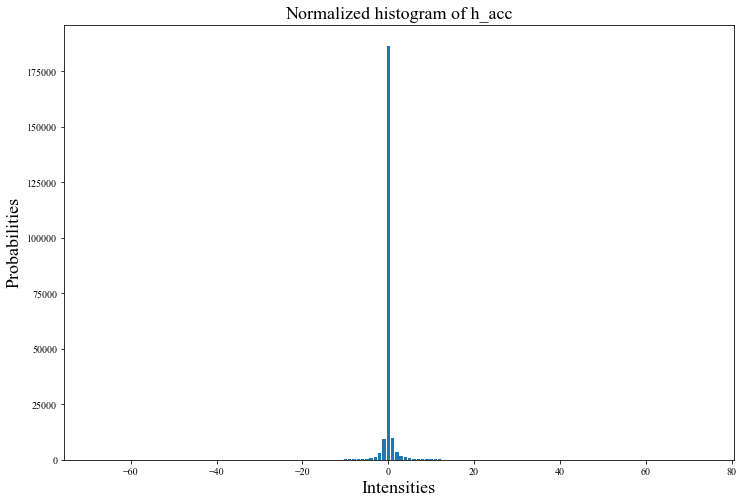

In [116]:
plt.figure(figsize = (12,8))
plt.bar(np.arange(-68, 74), h_acc/len(h_acc))
plt.xlabel('Intensities', fontsize = 18)
plt.ylabel('Probabilities', fontsize = 18)
plt.title('Normalized histogram of h_acc', fontsize = 18)
plt.show()

In [117]:
length = []
for k in huff_codes_acc:
    res = len(huff_codes_acc[k])
    length = np.append(length ,  res)

In [118]:
print('the average code word length for the Huffman code huff_codes_acc :')
print(np.sum(length)/207)

the average code word length for the Huffman code huff_codes_acc :
7.714975845410628


In [119]:
I = tif.imread('mandrill.tif')
I_offset = I.astype('float') - 128
nbins_offset = len(np.arange(I_offset.min(), I_offset.max()+1))
h, bins = np.histogram(I_offset.flatten(), bins=nbins_offset, range = (I_offset.min(), I_offset.max()+1))
huff_codes, rev_huff_codes = huffman_codes(I_offset)
b = np.arange(I_offset.min(), I_offset.max()+1)

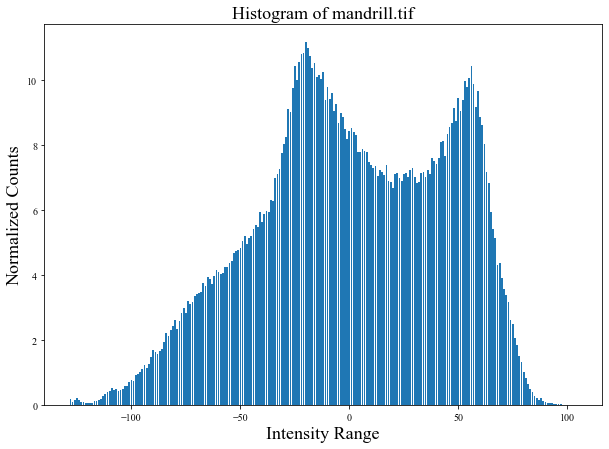

In [120]:
plt.figure(figsize=(10,7))
plt.bar(b, h/len(h))
plt.title('Histogram of mandrill.tif', fontsize = 18)
plt.xlabel('Intensity Range', fontsize = 18)
plt.ylabel('Normalized Counts', fontsize = 18)
plt.show()

In [121]:
length = []
for k in huff_codes:
    res = len(huff_codes[k])
    length = np.append(length ,  res)

In [122]:
print('the average code word length for the Huffman code huff_codes:')
print(np.sum(length)/228)

the average code word length for the Huffman code huff_codes:
8.881578947368421


#### <span style='font-family:"Times New Roman"'> <span styel=''>The normalized histograms for both h and h_acc are distributed almost uniformly around 0. However, since the number of images in BDSD dataset is more, there is a spike on 0 intensity, and other intensity values seems to have really small values. Furthermore, the intensity range of BDSD dataset is smaller than Mandrill image. 

## <span style='font-family:"Times New Roman"'> <span styel=''> (e-ii) Compare Specific to General Huffman Table:

In [123]:
def huffman_decoder_zz(Ib,Dict):
    r = int(Ib[0:10], 2)
    c = int(Ib[10:20], 2)
    FI = np.zeros((r,c))
    Ibits = Ib[20:]
    MS = []
    res = ""
    while Ibits:
        for k in Dict:
            if Ibits.startswith(k):
                res = Dict[k]
                Ibits = Ibits[len(k):]
                MS.append(str(res))
    Img = np.array(MS)
    ImgReshaped = np.reshape(Img,(int((c*r)/64),8,8))
        
    k = 0
    for r in range (0,FI.shape[0],8):
        for c in range (0,FI.shape[1],8):
            II = ImgReshaped[k,:,:]
            Invzz = inverse_zigzag(II.flatten(), 8, 8)
            FI[r : r + 8 , c : c + 8] = sp.fft.idct(sp.fft.idct(Invzz,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            k += 1  
    return FI

In [124]:
I = tif.imread('mandrill.tif')
I_offset = I.astype('float') - 128

In [125]:
I_DCT = DCTcalc(I_offset)
I_DCT = np.round(I_DCT)

In [126]:
FImage = np.zeros((512,512,6))
SF = [1,2,4,8,16,32]
C = [] #Compression Ratio
b = 8 * (512**2)
Err = []
for m in range (len(SF)):
    I_DCT_reshape = np.zeros((8,8,int(I_DCT.shape[0]*I_DCT.shape[1]/64)))
    I_DCT_hat = np.zeros((I_DCT.shape[0],I_DCT.shape[1]))
    k = 0
    for r in range (0,I_DCT.shape[0],8):
        for c in range (0,I_DCT.shape[1],8):
            I_dump = np.divide(I_DCT[r : r + 8 , c : c + 8],np.dot(SF[m],Z))
            I_DCT_reshape[:,:,k] = np.round(I_dump)
            k += 1
    k = 0
    for r in range (0,I_DCT.shape[0],8):
        for c in range (0,I_DCT.shape[1],8):
            I_DCT_hat[r : r + 8 , c : c + 8] = I_DCT_reshape[:,:,k]
            k += 1
    HC_hat, RHC_hat = huffman_codes(I_DCT_hat)
    I_bits_zz = huffman_encoder_zz(I_DCT_hat.astype('int'),huff_codes_acc)
    bprime = len(I_bits_zz)
    CR = b/bprime
    C = np.append(C,CR)
    Decoded_I_bits_zz = huffman_decoder_zz(I_bits_zz,rev_huff_codes_acc)
    FImage[:,:,m] = Decoded_I_bits_zz
    DA = np.subtract(I.astype('int'), Decoded_I_bits_zz.astype('int') + 128) # Difference array
    SQA = np.square(DA) # squared array
    MSE = SQA.mean() # Mean of squared array
    Err = np.append(Err,MSE)

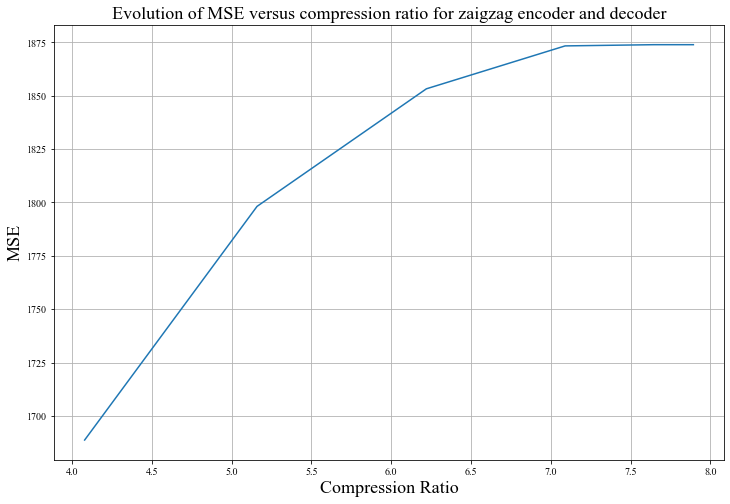

In [127]:
plt.figure(figsize = (12,8))
plt.title('Evolution of MSE versus compression ratio for zaigzag encoder and decoder', fontsize = 18)
plt.plot(C,Err)
plt.xlabel('Compression Ratio', fontsize = 18)
plt.ylabel('MSE', fontsize = 18)
plt.grid()
plt.show()

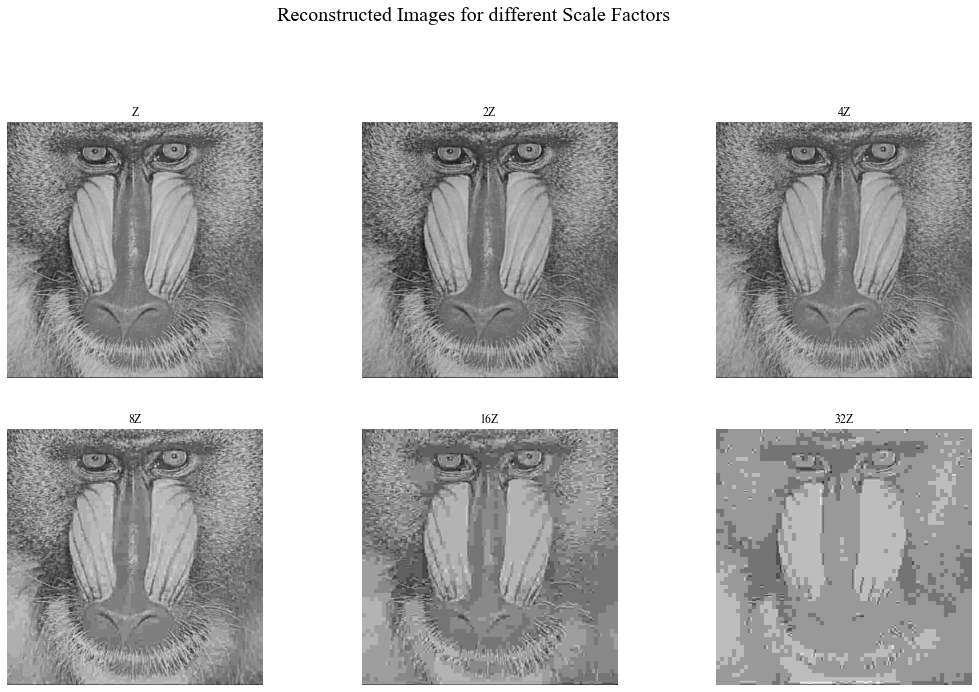

In [128]:
fig = plt.figure(figsize=(18, 16))
plt.subplot(3, 3, 1)
plt.imshow(FImage[:,:,0], cmap='gray')
plt.title('Z')
plt.axis('off')
plt.subplot(3, 3, 2)
plt.imshow(FImage[:,:,1], cmap='gray')
plt.title('2Z')
plt.axis('off')
plt.subplot(3, 3, 3)
plt.imshow(FImage[:,:,2], cmap='gray')
plt.title('4Z')
plt.axis('off')
plt.subplot(3, 3, 4)
plt.imshow(FImage[:,:,3], cmap='gray')
plt.title('8Z')
plt.axis('off')
plt.subplot(3, 3, 5)
plt.imshow(FImage[:,:,4], cmap='gray')
plt.title('16Z')
plt.axis('off')
plt.subplot(3, 3, 6)
plt.imshow(FImage[:,:,5], cmap='gray')
plt.title('32Z')
plt.axis('off')
fig.suptitle('Reconstructed Images for different Scale Factors', fontsize = 20)
plt.show()

#### <span style='font-family:"Times New Roman"'> <span styel=''>As it was expected, the reconstructed images look similar to reconstructed images in part (d-vi) since we are using larger dictionary that has 200 images which result in diverse dictionary creation. Also, the MSE trend is similar and values are close of those in part (d-vi). However, the reconstructed images do not have exact values compared to reconstructed images in part (d-vi) since different Huffman tables have leveraged to reconstruct these images.   

## <span style='font-family:"Times New Roman"'> <span styel=''> (e-iii) Compute Average Compression Ratio versus Average Quality:

In [129]:
def huffman_decoder_zz(Ib,Dict):
    r = int(Ib[0:10], 2)
    c = int(Ib[10:20], 2)
    FI = np.zeros((r,c))
    Ibits = Ib[20:]
    MS = []
    res = ""
    while Ibits:
        for k in Dict:
            if Ibits.startswith(k):
                res = Dict[k]
                Ibits = Ibits[len(k):]
                MS.append(str(res))
    Img = np.array(MS)
    ImgReshaped = np.reshape(Img,(int((c*r)/64),8,8))
        
    k = 0
    for r in range (0,FI.shape[0],8):
        for c in range (0,FI.shape[1],8):
            II = ImgReshaped[k,:,:]
            Invzz = inverse_zigzag(II.flatten(), 8, 8)
            FI[r : r + 8 , c : c + 8] = sp.fft.idct(sp.fft.idct(Invzz,type=2,norm='ortho',axis=0),type=2,norm='ortho',axis=1)
            k += 1  
    return FI

In [130]:
#Sorting the image files:
image_filenames = sorted(glob.glob(Test_directory + '\\*.jpg'))

#Looping over images:

SF = [1,2,4,8,16,32]
AvgErr = []
AvgC = []
start_time = time.time()
for m in range (len(SF)):
    Err = []
    C = [] #Compression Ratio
    for f,image_filename in enumerate(image_filenames):
        name = os.path.basename(image_filenames[f])[:-4]
        GSI = mpimg.imread(Test_directory + '\\' + name +'.jpg') 
        GSI = rgb2gray(GSI)
        GSI = GSI - np.amin(GSI)
        GSI = (GSI/(np.amax(GSI))) * 255
        h1 = math.ceil(GSI.shape[0]/8)*8 - GSI.shape[0]
        w = math.ceil(GSI.shape[1]/8)*8 - GSI.shape[1]
        GSIpad = np.pad(GSI, [(0,w), (0,h1)], mode='constant')
        GSI_offset = GSIpad.astype('float') - 128
        GSI_DCT = DCTcalc(GSI_offset)
        GSI_DCT = np.round(GSI_DCT)
        GSI_DCT_reshape = np.zeros((8,8,int(GSI_DCT.shape[0]*GSI_DCT.shape[1]/64)))
        GSI_DCT_hat = np.zeros((GSI_DCT.shape[0],GSI_DCT.shape[1]))
        k = 0
        for r in range (0,GSI_DCT.shape[0],8):
            for c in range (0,GSI_DCT.shape[1],8):
                I_dump = np.divide(GSI_DCT[r : r + 8 , c : c + 8],np.dot(SF[m],Z))
                GSI_DCT_reshape[:,:,k] = np.round(I_dump)
                k += 1
        k = 0
        for r in range (0,GSI_DCT.shape[0],8):
            for c in range (0,GSI_DCT.shape[1],8):
                GSI_DCT_hat[r : r + 8 , c : c + 8] = GSI_DCT_reshape[:,:,k]
                k += 1
        GSI_DCT_hat = GSI_DCT_hat.astype(int)
        HC_hat, RHC_hat = huffman_codes(GSI_DCT_hat)
        I_bits_zz = huffman_encoder_zz(GSI_DCT_hat.astype('int'),huff_codes_acc)
        bprime = len(I_bits_zz)
        b = 8 * (GSI.shape[0]*GSI.shape[1])
        CR = b/bprime
        C = np.append(C,CR)
        Decoded_I_bits_zz = huffman_decoder_zz(I_bits_zz,rev_huff_codes_acc)
        Unpadded = Decoded_I_bits_zz[:-w, :]
        Unpadded = Unpadded[:, :-h1]
        DA = np.subtract(GSI.astype('int'), (Unpadded).astype('int') + 128) # Difference array
        SQA = np.square(DA) # squared array
        MSE = SQA.mean() # Mean of squared array
        Err = np.append(Err,MSE) 
    if (SF[m] == 1) :
        LCRI = ((mpimg.imread(image_filenames[np.argmax(C)])).astype(np.uint8))
        LCRV = C[np.argmax(C)]
        LCRMSE = Err[np.argmax(C)]
        SCRI = ((mpimg.imread(image_filenames[np.argmin(C)])).astype(np.uint8))
        SCRV = C[np.argmin(C)]
        SCRMSE = Err[np.argmin(C)]
    AvgErr = np.append(AvgErr,np.mean(Err)) 
    AvgC = np.append(AvgC,np.mean(C)) 
elapsed_time = time.time() - start_time

In [131]:
print('Elapsed Time (Hours):')
print(elapsed_time/3600)

Elapsed Time (Hours):
1.3787280599276224


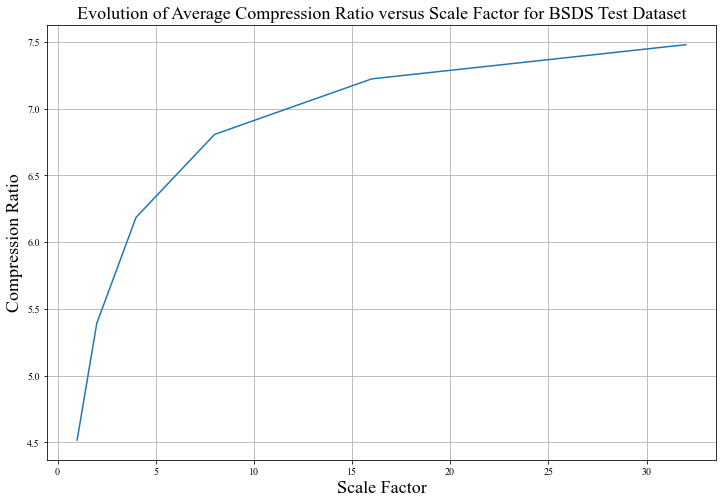

In [132]:
plt.figure(figsize = (12,8))
plt.title('Evolution of Average Compression Ratio versus Scale Factor for BSDS Test Dataset', fontsize = 18)
plt.plot(SF,AvgC)
plt.xlabel('Scale Factor', fontsize = 18)
plt.ylabel('Compression Ratio', fontsize = 18)
plt.grid()
plt.show()

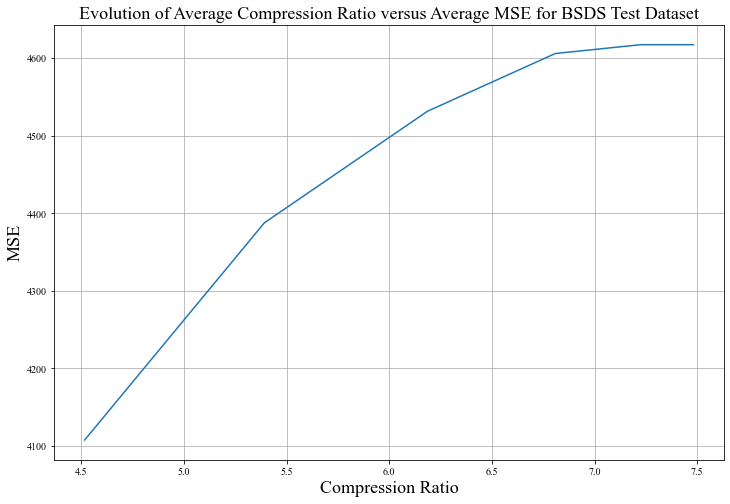

In [133]:
plt.figure(figsize = (12,8))
plt.title('Evolution of Average Compression Ratio versus Average MSE for BSDS Test Dataset', fontsize = 18)
plt.plot(AvgC,AvgErr)
plt.xlabel('Compression Ratio', fontsize = 18)
plt.ylabel('MSE', fontsize = 18)
plt.grid()
plt.show()

#### <span style='font-family:"Times New Roman"'> <span styel=''>Non-padded images have been used for the sake of comparison. It seems logical to un pad the images after zero padding since keeping the padded images and comparing them to zero padded images may introduce unfavorable errors for MSE calculation. Also, when trying to display the images, the unpadded version would be the target. 

## <span style='font-family:"Times New Roman"'> <span styel=''> (e-iv) Explore the Variation in Compression Ratio:

In [134]:
GLCRI = rgb2gray(LCRI)

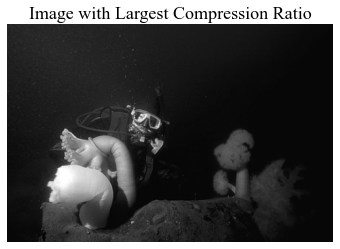

In [135]:
plt.title('Image with Largest Compression Ratio', fontsize = 18)
plt.imshow(GLCRI, cmap = 'gray')
plt.axis('off')
plt.show()

In [136]:
GLCRI = GLCRI - np.amin(GLCRI)
GLCRI = (GLCRI/(np.amax(GLCRI))) * 255
h1 = math.ceil(GLCRI.shape[0]/8)*8 - GLCRI.shape[0]
w = math.ceil(GLCRI.shape[1]/8)*8 - GLCRI.shape[1]
GLCRIpad = np.pad(GLCRI, [(0,w), (0,h1)], mode='constant')
GLCRIpad_offset = GLCRIpad.astype('float') - 128
GLCRI_DCT = DCTcalc(GLCRIpad_offset)
GLCRI_DCT = np.round(GLCRI_DCT)
GLCRI_DCT_reshape = np.zeros((8,8,int(GLCRI_DCT.shape[0]*GLCRI_DCT.shape[1]/64)))
GLCRI_DCT_hat = np.zeros((GLCRI_DCT.shape[0],GLCRI_DCT.shape[1]))
k = 0
for r in range (0,GLCRI_DCT.shape[0],8):
    for c in range (0,GLCRI_DCT.shape[1],8):
        I_dump = np.divide(GLCRI_DCT[r : r + 8 , c : c + 8],Z)
        GLCRI_DCT_reshape[:,:,k] = np.round(I_dump)
        k += 1
k = 0
for r in range (0,GLCRI_DCT.shape[0],8):
    for c in range (0,GLCRI_DCT.shape[1],8):
        GLCRI_DCT_hat[r : r + 8 , c : c + 8] = GLCRI_DCT_reshape[:,:,k]
        k += 1
GLCRI_DCT_hat = GLCRI_DCT_hat.astype(int)
HC_hat, RHC_hat = huffman_codes(GLCRI_DCT_hat)
I_bits_zz = huffman_encoder_zz(GLCRI_DCT_hat.astype('int'),huff_codes_acc)
Decoded_I_bits_zz = huffman_decoder_zz(I_bits_zz,rev_huff_codes_acc)
Unpadded = Decoded_I_bits_zz[:-w, :]
Unpadded = Unpadded[:, :-h1]

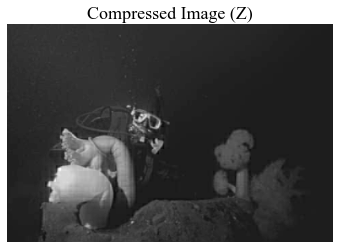

In [137]:
plt.title('Compressed Image (Z)', fontsize = 18)
plt.imshow(Unpadded, cmap = 'gray')
plt.axis('off')
plt.show()

In [138]:
print('Compression ratio of the image is :')
print(LCRV)

Compression ratio of the image is :
5.90361756735443


In [139]:
print('MSE of the decoded image with largest compression ratio is :')
print(LCRMSE)

MSE of the decoded image with largest compression ratio is :
9329.771134901976


In [140]:
GSCRI = rgb2gray(SCRI)

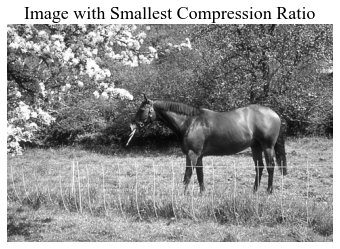

In [141]:
plt.title('Image with Smallest Compression Ratio', fontsize = 18)
plt.imshow(GSCRI, cmap = 'gray')
plt.axis('off')
plt.show()

In [142]:
GSCRI = GSCRI - np.amin(GSCRI)
GSCRI = (GSCRI/(np.amax(GSCRI))) * 255
h1 = math.ceil(GSCRI.shape[0]/8)*8 - GSCRI.shape[0]
w = math.ceil(GSCRI.shape[1]/8)*8 - GSCRI.shape[1]
GSCRIpad = np.pad(GSCRI, [(0,w), (0,h1)], mode='constant')
GSCRIpad_offset = GSCRIpad.astype('float') - 128
GSCRI_DCT = DCTcalc(GSCRIpad_offset)
GSCRI_DCT = np.round(GSCRI_DCT)
GSCRI_DCT_reshape = np.zeros((8,8,int(GSCRI_DCT.shape[0]*GSCRI_DCT.shape[1]/64)))
GSCRI_DCT_hat = np.zeros((GSCRI_DCT.shape[0],GSCRI_DCT.shape[1]))
k = 0
for r in range (0,GSCRI_DCT.shape[0],8):
    for c in range (0,GSCRI_DCT.shape[1],8):
        I_dump = np.divide(GSCRI_DCT[r : r + 8 , c : c + 8],Z)
        GSCRI_DCT_reshape[:,:,k] = np.round(I_dump)
        k += 1
k = 0
for r in range (0,GSCRI_DCT.shape[0],8):
    for c in range (0,GSCRI_DCT.shape[1],8):
        GSCRI_DCT_hat[r : r + 8 , c : c + 8] = GSCRI_DCT_reshape[:,:,k]
        k += 1
GSCRI_DCT_hat = GSCRI_DCT_hat.astype(int)
HC_hat, RHC_hat = huffman_codes(GSCRI_DCT_hat)
I_bits_zz = huffman_encoder_zz(GSCRI_DCT_hat.astype('int'),huff_codes_acc)
Decoded_I_bits_zz = huffman_decoder_zz(I_bits_zz,rev_huff_codes_acc)
Unpadded = Decoded_I_bits_zz[:-w, :]
Unpadded = Unpadded[:, :-h1]

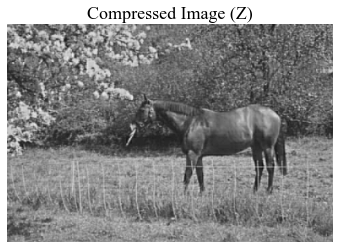

In [143]:
plt.title('Compressed Image (Z)', fontsize = 18)
plt.imshow(Unpadded, cmap = 'gray')
plt.axis('off')
plt.show()

In [144]:
print('Compression ratio of the image is :')
print(SCRV)

Compression ratio of the image is :
3.296789174473537


In [145]:
print('MSE of the decoded image with smallest compression ratio is :')
print(SCRMSE)

MSE of the decoded image with smallest compression ratio is :
3044.0141773693176


#### <span style='font-family:"Times New Roman"'> <span styel=''>The image with large compressive ratio has less dynamic range (uniform intensity values). Hence, applying block transform would result in more pixels to encoded using same dictionary keys in that image and hence, higher compression ratio is achieved. When the ratio of compression is large, larger MSE is expected. On the other hand, the image with lower compression ratio has higher dynamic range. Based on fundamentals of block transform coding with DCT, getting smaller compression ratio compared to pervious image was expected (longer bitstreams since we are using different dictionary keys). When the compression ratio is small, calculated MSE value should be small too compared to pervious image.    

# <span style='font-family:"Times New Roman"'> <span styel=''>(f) Summary.

#### <span style='font-family:"Times New Roman"'> <span styel=''>In this project, image compression using DCT which is the fundamental aspect of ‘jpeg’ compression is investigated. This method is a powerful tool for image compression. One of the main advantages of this method was the fast implementation. 
#### <span style='font-family:"Times New Roman"'> <span styel=''>Zigzag scanning is important for increasing zero run length of our bitstreams resulted from encoder and hence, reducing the computational effort for compressing an image. 
#### <span style='font-family:"Times New Roman"'> <span styel=''>Also, it comes with no surprise that if we create a large dictionary using Huffman code, the final compression result would have better quality (MSE wise and qualitative wise). So, in image compression, having a comprehensive dictionary generated from Huffman code is essential.  
#### <span style='font-family:"Times New Roman"'> <span styel=''>This compression procedure has done a decent job when dealing with images with less dynamic range. Also, images with less details on them (less objects and less object boundaries) could be compressed with less error. High frequency occurrences are the places that compression procedure resulted in more distortions which will consequently increase the compression error. 
#### <span style='font-family:"Times New Roman"'> <span styel=''> If we want to have a better algorithm, I think blurring the edges, compressing the image, and finally, sharpening the edges may solve the boundary distortion issue and result in accurate compression. 